In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

Init Plugin
Init Graph Optimizer
Init Kernel


In [3]:
# Specify data paths
dataset = 'out/lala.csv'
model_save_path = 'models/classifier.hdf5'
tflite_save_path = 'models/lite.hdf5'

# Load Dataset

In [94]:
data = pd.read_csv(dataset, header=None) 

y = data.iloc[:, 0]
X = data.iloc[: , 1:]

y.value_counts()

three              100
two_up_inverted    100
palm               100
fist               100
peace_inverted     100
one                100
three2             100
four               100
stop               100
two_up             100
ok                 100
dislike             99
peace               98
mute                97
stop_inverted       97
rock                96
like                94
call                56
Name: 0, dtype: int64

In [95]:
classes = y.unique()
classes = {classes[i]: i for i in range(len(classes))}

y = y.map(classes)

X = X.to_numpy().astype(np.float32)
y = y.to_numpy().astype(np.float32)

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=RANDOM_SEED)

# # y_train = y_train.reshape(len(y_train),1)
# # y_test = y_test.reshape(len(y_test),1)
# classes = len(np.unique(y))

In [97]:
n_input = X_train.shape[1]
n_output = y.nunique()

model = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer((n_input, )),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(n_output, activation='softmax')
])

AttributeError: 'numpy.ndarray' object has no attribute 'nunique'

In [98]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False, save_best_only=True)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=50, verbose=1)

# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary() 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_3 (Dropout)          (None, 42)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                1376      
_________________________________________________________________
dropout_4 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 32)                1056      
_________________________________________________________________
dropout_5 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_7 (Dense)              (None, 18)                3

In [99]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=64,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback],
    verbose=1
)

Epoch 1/1000


2022-07-21 22:15:30.559731: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


21/21 [==============================] - 1s 24ms/step - loss: 1.7348 - accuracy: 0.5983 - val_loss: 0.4632 - val_accuracy: 0.8759

Epoch 00001: val_loss improved from inf to 0.46316, saving model to models/classifier.hdf5
Epoch 2/1000
 1/21 [>.............................] - ETA: 0s - loss: 1.6151 - accuracy: 0.5625

2022-07-21 22:15:31.159104: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


21/21 [==============================] - 1s 25ms/step - loss: 1.4997 - accuracy: 0.5975 - val_loss: 0.5289 - val_accuracy: 0.8529

Epoch 00002: val_loss did not improve from 0.46316
Epoch 3/1000
21/21 [==============================] - 0s 15ms/step - loss: 1.2662 - accuracy: 0.6298 - val_loss: 0.5732 - val_accuracy: 0.8230

Epoch 00003: val_loss did not improve from 0.46316
Epoch 4/1000
21/21 [==============================] - 0s 23ms/step - loss: 1.1904 - accuracy: 0.6214 - val_loss: 0.5533 - val_accuracy: 0.8368

Epoch 00004: val_loss did not improve from 0.46316
Epoch 5/1000
21/21 [==============================] - 0s 15ms/step - loss: 1.1133 - accuracy: 0.6183 - val_loss: 0.5604 - val_accuracy: 0.8621

Epoch 00005: val_loss did not improve from 0.46316
Epoch 6/1000
21/21 [==============================] - 0s 17ms/step - loss: 1.1642 - accuracy: 0.6260 - val_loss: 0.5603 - val_accuracy: 0.8598

Epoch 00006: val_loss did not improve from 0.46316
Epoch 7/1000
21/21 [==================

In [100]:
model = tf.keras.models.load_model(model_save_path)
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=64)

1/7 [===>..........................] - ETA: 2s - loss: 0.6344 - accuracy: 0.8438

2022-07-21 22:15:49.408661: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 0s 24ms/step - loss: 0.4632 - accuracy: 0.8759


In [101]:
model = tf.keras.models.load_model(model_save_path)

In [102]:
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

[1.7345497e-02 1.3743242e-02 4.4651553e-23 5.2018384e-10 7.1182299e-01
 1.2042823e-04 3.6952141e-19 6.2641492e-03 3.6429308e-06 1.8779714e-13
 3.3931844e-03 3.0623146e-04 2.4681213e-01 7.0420647e-05 1.1795955e-04
 7.1777009e-08 6.8334700e-12 3.2371730e-24]
4


2022-07-21 22:17:13.643668: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


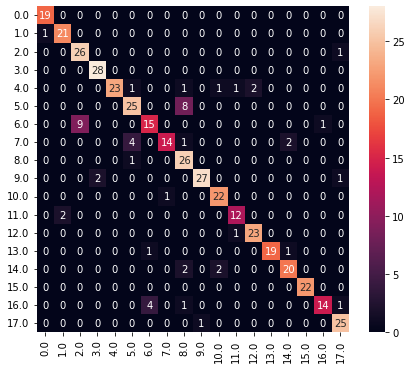

Classification Report
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97        19
         1.0       0.91      0.95      0.93        22
         2.0       0.74      0.96      0.84        27
         3.0       0.93      1.00      0.97        28
         4.0       1.00      0.79      0.88        29
         5.0       0.81      0.76      0.78        33
         6.0       0.75      0.60      0.67        25
         7.0       0.93      0.67      0.78        21
         8.0       0.67      0.96      0.79        27
         9.0       0.96      0.90      0.93        30
        10.0       0.88      0.96      0.92        23
        11.0       0.86      0.86      0.86        14
        12.0       0.92      0.96      0.94        24
        13.0       1.00      0.90      0.95        21
        14.0       0.87      0.83      0.85        24
        15.0       1.00      1.00      1.00        22
        16.0       0.93      0.70      0.80        20
     

In [103]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

In [104]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: /var/folders/3w/bsb667zn42gdhbqq3z8ptmgw0000gn/T/tmpwm36g0mr/assets


INFO:tensorflow:Assets written to: /var/folders/3w/bsb667zn42gdhbqq3z8ptmgw0000gn/T/tmpwm36g0mr/assets
2022-07-21 22:17:21.829196: I tensorflow/core/grappler/devices.cc:78] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 0 (Note: TensorFlow was not compiled with CUDA or ROCm support)
2022-07-21 22:17:21.829276: I tensorflow/core/grappler/clusters/single_machine.cc:357] Starting new session
2022-07-21 22:17:21.829434: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-07-21 22:17:21.829453: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2022-07-21 22:17:21.830597: I tensorflow/core/grappler/optimizers/meta_o

8400

Inference test

In [105]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [107]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: user 118 µs, sys: 35 µs, total: 153 µs
Wall time: 153 µs


In [108]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[1.72824468e-02 1.50461541e-02 6.24794056e-23 5.53343038e-10
 7.22680867e-01 1.04543506e-04 4.17657036e-19 6.60850946e-03
 3.27187490e-06 2.31811450e-13 2.99399788e-03 2.78773630e-04
 2.34790012e-01 8.82243985e-05 1.23085701e-04 7.77095721e-08
 7.89233782e-12 6.45249251e-24]
4
